In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
import neurodsp as ndsp

In [2]:
data_path = '/Users/rgao/Documents/Data/ECoG_KJM/digit/'
subjs = ['bp', 'cc', 'ht', 'jc', 'jp', 'mv', 'wc', 'wm', 'zt']

subj = subjs[0]
print(subj)
data = io.loadmat(data_path+'data/'+subj+'/'+subj+'_fingerflex.mat', squeeze_me=True)
ecog = data['data']
fs = 1000.
num_samp, num_chan = np.shape(ecog)
print(num_chan)

bp
46


In [3]:
# compute PSD
freqs, psd_mean = ndsp.spectral.psd(ecog.T,Fs=fs, method='mean')
freqs, psd_med = ndsp.spectral.psd(ecog.T,Fs=fs, method='median')

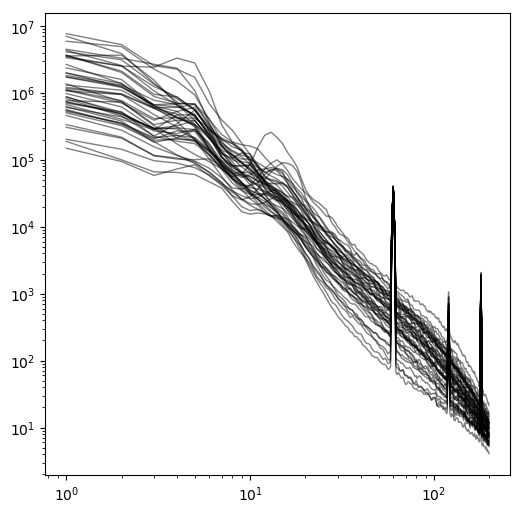

In [4]:
plt.figure(figsize=(6,6))
plt.loglog(freqs[:200], psd_mean[:,:200].T, 'k', lw=1, alpha=0.5);

In [5]:
# compute SCV
scv = np.zeros((int(fs/2+1), num_chan))
for chan in range(num_chan):
    freqs, scv[:,chan] = ndsp.spectral.scv(ecog[:,chan], Fs=fs)

chan 39


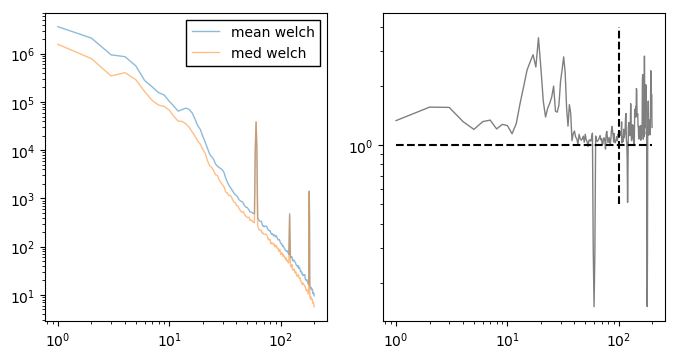

In [6]:
chan = 39
print('chan',chan)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.loglog(freqs[:200], psd_mean[chan,:200].T, lw=1, alpha=0.5)
plt.loglog(freqs[:200], psd_med[chan,:200].T, lw=1, alpha=0.5)
plt.legend(('mean welch', 'med welch'))
plt.subplot(1,2,2)
plt.loglog(freqs[:200], scv[:200, chan], 'k', lw=1, alpha=0.5)
plt.plot([1,200], [1,1], 'k--')
plt.plot([100,100], [0.5,4], 'k--');

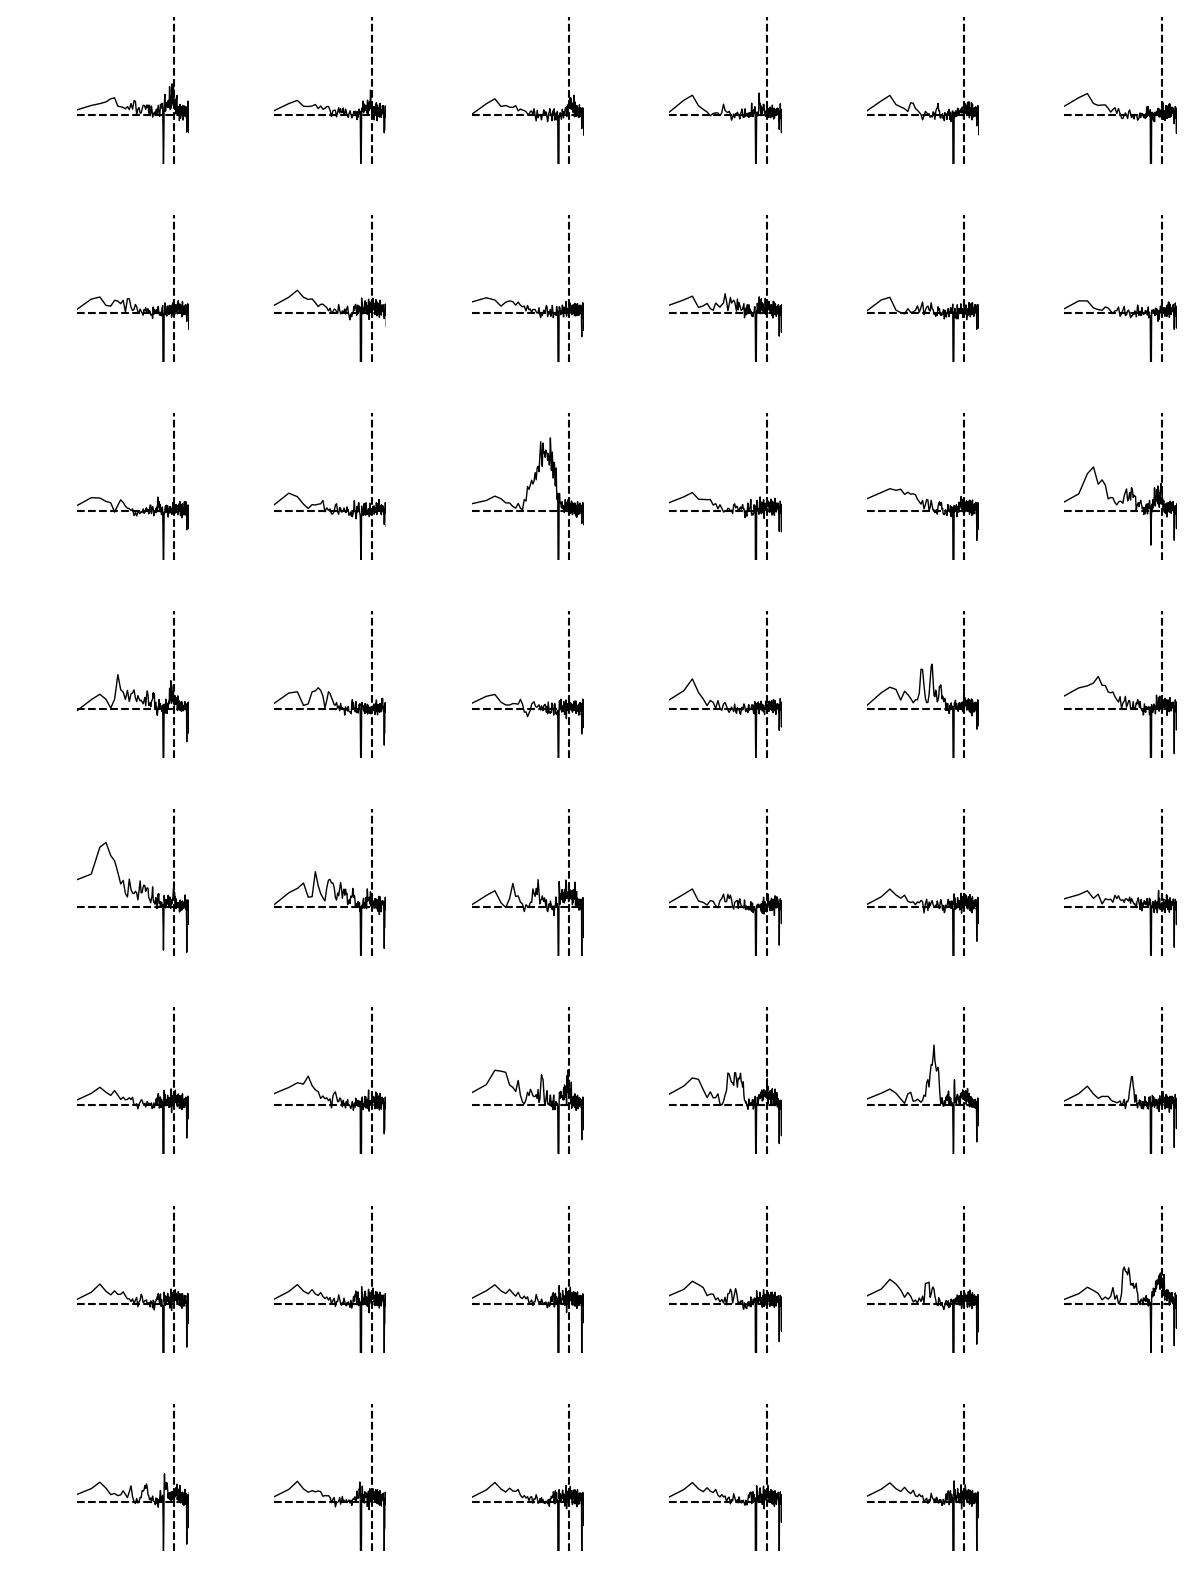

In [67]:
plt.figure(figsize=(12,16))
for chan in range(num_chan):
    plt.subplot(8,6,chan+1)
    plt.loglog(freqs, scv[:,chan], 'k', lw=1);
    plt.plot([1,500], [1,1], 'k--')
    plt.plot([100,100], [0.5,4], 'k--')
    plt.xlim([1, 200])
    plt.ylim([0.5, 4])
    plt.axis('off')

plt.tight_layout()

### spectral PCA

In [7]:
from sklearn.decomposition import PCA

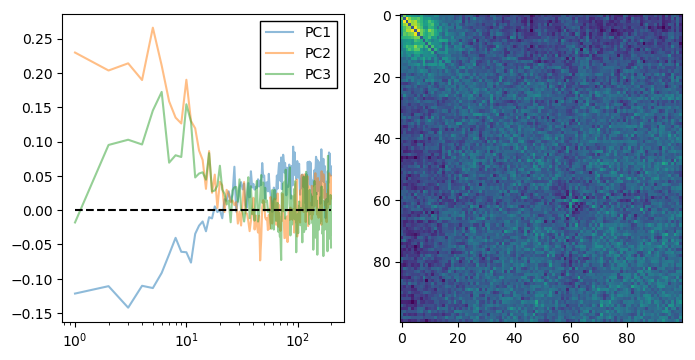

In [33]:
num_freq = 100
chan = 0
f_axis, t_axis, spg = sp.signal.spectrogram(ecog[:,chan], fs=fs, nperseg=int(fs), noverlap=0)
pca = PCA(n_components=3)
pca.fit(np.log10(np.abs(spg**2).T))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogx(f_axis[1:200],pca.components_[:,1:200].T, alpha=0.5)
plt.plot([1,200], [0,0], 'k--')
plt.legend(('PC1', 'PC2', 'PC3'))

plt.subplot(1,2,2)
plt.imshow(sp.corrcoef(np.log10(np.abs(spg**2)))[:num_freq,:num_freq]*(np.ones((num_freq, num_freq))-np.eye(num_freq)))
#plt.colorbar()

### save out all PSD and SCV plots

In [159]:
data_path = '/Users/rgao/Documents/Data/ECoG_KJM/digit/'
subjs = ['bp', 'cc', 'ht', 'jc', 'jp', 'mv', 'wc', 'wm', 'zt']
elec_regios = {
    '1': 'dorsal M1',
    '3': 'dorsal S1',
    '4': 'ventral S1+M1',
    '6': 'frontal (non-R)',
    '7': 'parietal (non-R)',
    '8': 'temporal',
    '9': 'occipital'
}

plt.figure(figsize=(8,4))
for subj in subjs:
    print(subj)
    data = io.loadmat(data_path+'data/'+subj+'/'+subj+'_fingerflex.mat', squeeze_me=True)
    ecog = data['data']
    fs = 1000.
    num_samp, num_chan = np.shape(ecog)
    # compute PSD
    freqs, psd_mean = ndsp.spectral.psd(ecog.T,Fs=fs, method='mean')
    _, psd_med = ndsp.spectral.psd(ecog.T,Fs=fs, method='median')
    scv = np.zeros((int(fs/2+1), num_chan))
    for chan in range(num_chan):
        freqs, scv[:,chan] = ndsp.spectral.scv(ecog[:,chan], Fs=fs)
        try:
            ele_name = elec_regios[str(data['elec_regions'][chan])]
        except:
            ele_name = 'others'

        # make & save plots
        plt.subplot(1,2,1)
        plt.loglog(freqs[:200], psd_mean[chan,:200].T, lw=1, alpha=0.5)
        plt.loglog(freqs[:200], psd_med[chan,:200].T, lw=1, alpha=0.5)
        plt.legend(('mean welch', 'med welch'))
        plt.subplot(1,2,2)
        plt.loglog(freqs[:300], scv[:300, chan], 'k', lw=1, alpha=0.5)
        plt.legend([ele_name])
        plt.plot([1,200], [1,1], 'k--')
        plt.plot([100,100], [0.5,4], 'k--');
        plt.xlim([1, 300])
        plt.ylim([0.5, 4])
        plt.tight_layout()
        # save out
        plt.savefig(data_path+'/scv_figs/'+subj+'_' + str(chan) + '.png')
        plt.clf()

bp
cc
ht
jc
jp
mv
wc
wm
zt


### trialed analysis

In [119]:
stim_info = io.loadmat(data_path+'data/'+subj+'/'+subj+'_stim.mat', squeeze_me=True)

(10000, 20000)

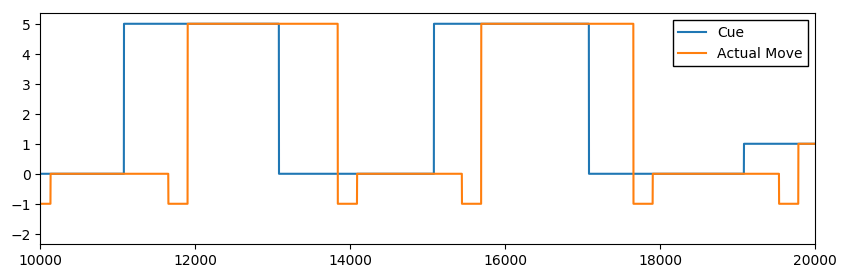

In [135]:
stim = stim_info['stim']
plt.figure(figsize=(10,3))
plt.plot(data['cue'])
plt.plot(stim)
plt.legend(('Cue', 'Actual Move'))
plt.xlim([10000,20000])